<BR>
<FONT SIZE="7">様々な最小二乗学習</FONT>
<BR>
Source: https://qiita.com/kotaroito/items/4eb29d42d7f8c534332f
<BR>
(scikit-learnで線形モデルとカーネルモデルの回帰分析をやってみた - イラストで学ぶ機会学習)

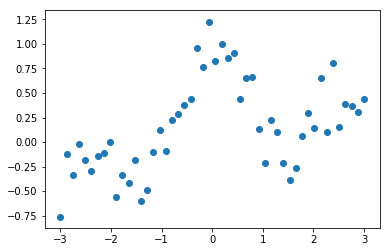

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

n = 50; N = 1000

x = np.linspace(-3, 3, n)
X = np.linspace(-3, 3, N)

pix = np.pi * x
y = np.sin(pix) / pix + 0.1 * x + 0.2 * np.random.randn(n)

x = x.reshape(-1, 1)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x,y)

<BR>
<font size="7">1. 線形モデルによる回帰</font>

0.199402418545


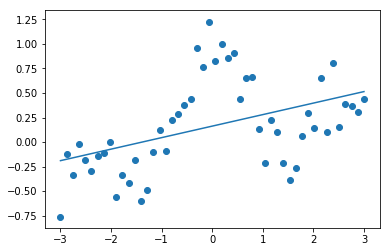

In [2]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x, y)

p = clf.predict(X)

plt.scatter(x, y)
plt.plot(X,p)

print(clf.score(x, y))

<BR>
<font size="7">2. カーネルモデルによる回帰</font>

0.905351234633


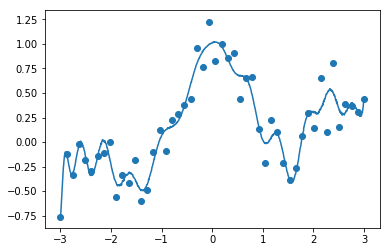

In [3]:
from sklearn.metrics.pairwise import rbf_kernel

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = LinearRegression()
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

<BR>
<font size="7">3. L2制約付きカーネルモデル回帰</font>

0.816560499812


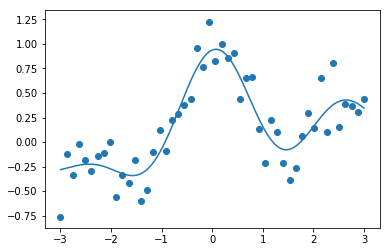

In [7]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = Ridge()
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

<BR>
<font size="7">4. L1制約付き回帰（LASSO回帰）</font>

0.770361563926


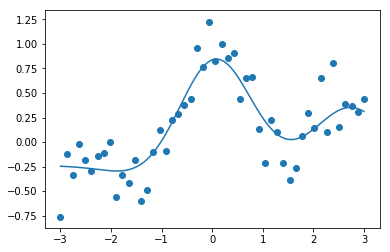

In [8]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = Lasso(alpha=0.01)
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y)) # 0.820550922167

In [9]:
print(clf.coef_)

[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -1.13935363e-01  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.10485899e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -8.68562787e-05
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   9.18123804e-02   5.02137431e-01
   0.00000000e+00   0.00000000e+00]


In [10]:
#おまけ(内部パラメータやメソッドを表示)
print(dir(clf))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_decision_function', '_estimator_type', '_get_param_names', '_preprocess_data', '_set_intercept', 'alpha', 'coef_', 'copy_X', 'dual_gap_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'l1_ratio', 'max_iter', 'n_iter_', 'normalize', 'path', 'positive', 'precompute', 'predict', 'random_state', 'score', 'selection', 'set_params', 'sparse_coef_', 'tol', 'warm_start']
